['경기도 화성시 봉담읍(4159025300)', '81,903', '32,962', '          2.48', '41,610', '40,293', '          1.03']
['경기도 화성시 우정읍(4159025600)', '17,378', '8,725', '          1.99', '9,465', '7,913', '          1.20']
['경기도 화성시 향남읍(4159025900)', '86,960', '39,083', '          2.23', '46,552', '40,408', '          1.15']
['경기도 화성시 남양읍(4159026200)', '42,026', '20,319', '          2.07', '22,932', '19,094', '          1.20']
['경기도 화성시 매송면(4159031000)', '7,085', '3,526', '          2.01', '3,759', '3,326', '          1.13']
['경기도 화성시 비봉면(4159032000)', '5,830', '3,022', '          1.93', '3,299', '2,531', '          1.30']
['경기도 화성시 마도면(4159033000)', '6,952', '3,964', '          1.75', '4,153', '2,799', '          1.48']
['경기도 화성시 송산면(4159034000)', '10,901', '5,521', '          1.97', '5,883', '5,018', '          1.17']
['경기도 화성시 서신면(4159035000)', '7,108', '3,915', '          1.82', '3,921', '3,187', '          1.23']
['경기도 화성시 팔탄면(4159036000)', '9,943', '6,091', '          1.63', '6,017', '3,926', '   

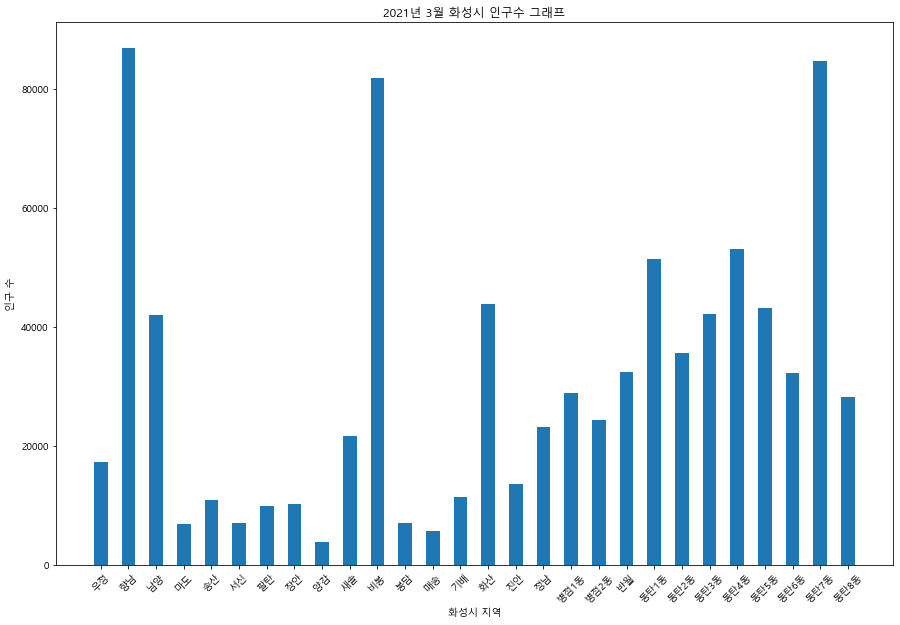

[' 향남읍', ' 동탄7동', ' 봉담읍', ' 동탄4동', ' 동탄1동', ' 진안동', ' 동탄5동', ' 동탄3동', ' 남양읍', ' 동탄2동', ' 반월동', ' 동탄6동', ' 병점1동', ' 동탄8동', ' 병점2동', ' 화산동', ' 새솔동', ' 우정읍', ' 기배동', ' 정남면', ' 송산면', ' 장안면', ' 팔탄면', ' 서신면', ' 매송면', ' 마도면', ' 비봉면', ' 양감면']
[86960, 84662, 81903, 53078, 51406, 43916, 43156, 42182, 42026, 35650, 32392, 32264, 28987, 28327, 24402, 23269, 21790, 17378, 13626, 11432, 10901, 10268, 9943, 7108, 7085, 6952, 5830, 3972]


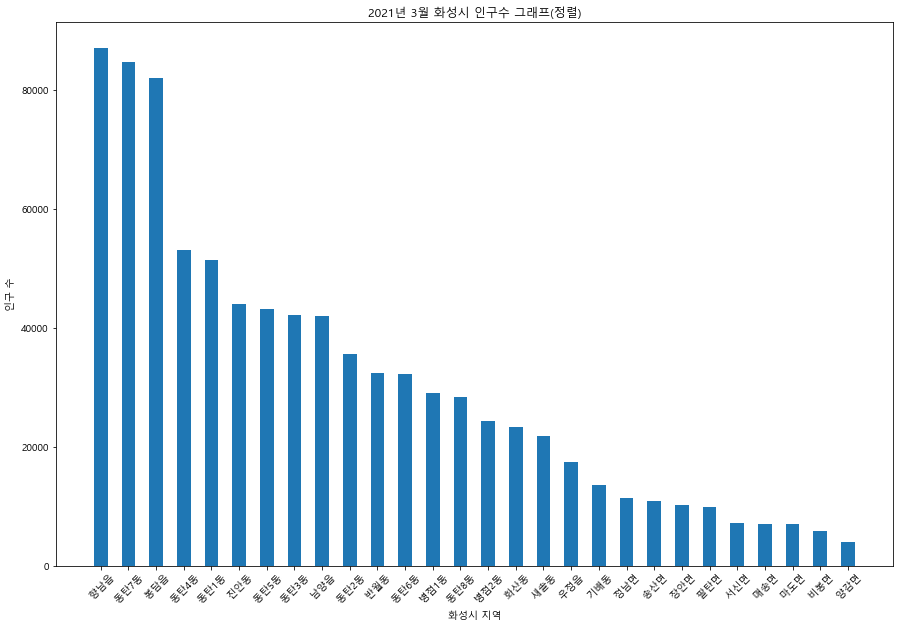

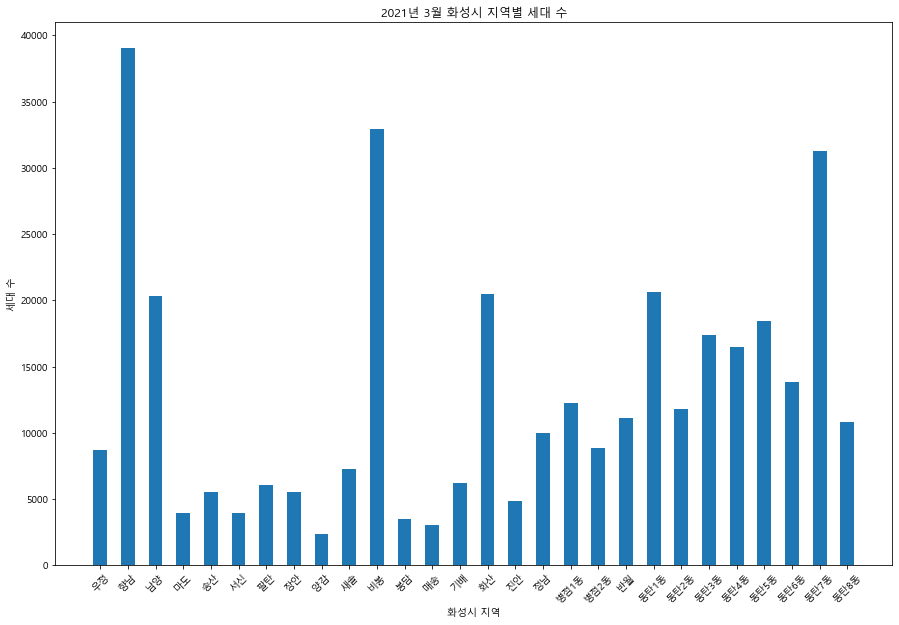

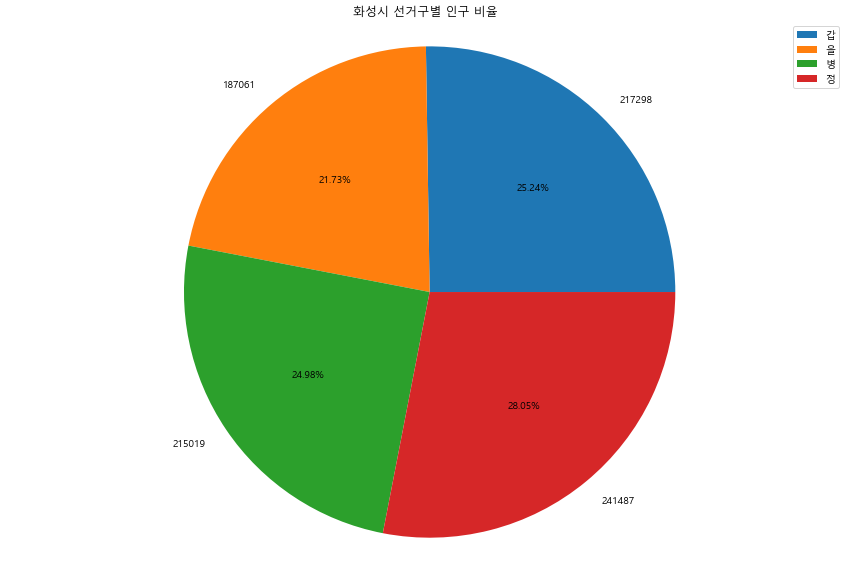

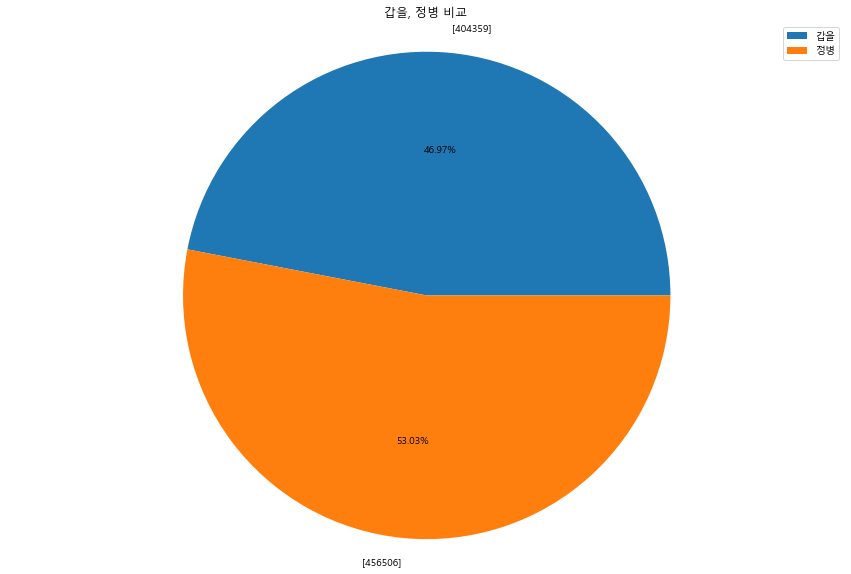

In [36]:
import csv
import matplotlib.pyplot as plt 
import numpy as np
import re

f = open('pop.csv')
fd = open('SocialLandArea.csv', encoding='utf-8')
data = csv.reader(f)
land = csv.reader(fd)

set_1 = ['우정', '향남', '남양', '마도', '송산', '서신', '팔탄', '장안', '양감', '새솔']
set_2 = ['비봉', '봉담', '매송', '기배', '화산', '진안', '정남']
set_3 = ['병점1동', '병점2동', '반월', '동탄1동', '동탄2동', '동탄3동']
set_4 = ['동탄4동', '동탄5동', '동탄6동', '동탄7동', '동탄8동']

city_set = [set_1, set_2, set_3, set_4]

compilation = [[], [], [], []]
total = [[],[],[],[]]
house = [[],[],[],[]]

header = next(data)
for row in data :
    for j in range(4) :
        for i in range(len(city_set[j])) :
            if city_set[j][i] in row[0] and '화성' in row[0] :
                print(row)
                row[1] = int(row[1].replace(',',''))
                row[2] = int(row[2].replace(',',''))
                compilation[j].append(row)
                total[j].append(row[1])
                house[j].append(row[2])
### 인구 수 ###
plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(15,10))
plt.title("2021년 3월 화성시 인구수 그래프")
total_list = total[0] + total[1] + total[2] + total[3]
city_list = set_1 + set_2 + set_3 + set_4
plt.xlabel('화성시 지역')
plt.ylabel('인구 수')
plt.xticks(rotation=45)
plt.bar(np.arange(len(total_list)), total_list, tick_label=city_list, width=0.5)
plt.savefig('.\\g_pop_bar.jpg')
plt.show()

### 인구 수 정렬 ###
compilation_list = compilation[1] + compilation[2] + compilation[3] + compilation[0]
compilation_list.sort(key = lambda x : x[1], reverse = True)
sorted_comp_city = []
sorted_comp_pop = []
string = ''
for i in range(len(compilation_list)) :
    sorted_comp_city.append(re.sub(r'\(.*', '', compilation_list[i][0].replace('경기도 화성시','')))
    sorted_comp_pop.append(compilation_list[i][1])
print(sorted_comp_city)
print(sorted_comp_pop)

plt.figure(figsize=(15,10))
plt.title("2021년 3월 화성시 인구수 그래프(정렬)")
plt.xlabel('화성시 지역')
plt.ylabel('인구 수')
plt.xticks(rotation=45)
plt.bar(np.arange(len(sorted_comp_pop)), sorted_comp_pop, tick_label=sorted_comp_city, width=0.5)
plt.savefig('.\\g_pop_bar_sorted.jpg')
plt.show()


### 세대 수 ###
plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(15,10))
plt.title("2021년 3월 화성시 지역별 세대 수")
house_list = house[0] + house[1] + house[2] + house[3]
city_list = set_1 + set_2 + set_3 + set_4
plt.xlabel('화성시 지역')
plt.ylabel('세대 수')
plt.xticks(rotation=45)
plt.bar(np.arange(len(house_list)), house_list, tick_label=city_list, width=0.5)
plt.savefig('.\\g_house_bar.jpg')
plt.show()

### 인구 수 비율 ### 
ward = ['갑', '을', '병', '정']
ward_string_list = [\
    ['우정', '향남', '남양', '마도', '송산', '서신', '팔탄', '장안', '양감', '새솔'], ['비봉', '봉담', '매송', '기배', '화산', '진안'],\
['병점1동', '병점2동', '반월', '동탄1동', '동탄2동', '동탄3동'],\
['동탄4동', '동탄5동', '동탄6동', '동탄7동', '동탄8동']]
ward_total_pop = []
ward_total_pop_tostring = []
for j in range(4) :
    total_num = 0
    for k in total[j] :
        total_num += k
    ward_total_pop.append(total_num)
for j in range(4) :
    ward_total_pop_tostring.append(str(ward_total_pop[j]))

plt.figure(figsize=(15,10))
plt.title('화성시 선거구별 인구 비율')
plt.pie(ward_total_pop, labels=ward_total_pop_tostring, autopct='%4.2f%%')
plt.legend(ward)
plt.axis('equal')
plt.savefig('.\\g_ward_pop_rate.jpg')


ward_1_2 = [ward_total_pop[0] + ward_total_pop[1]]
ward_3_4 = [ward_total_pop[2] + ward_total_pop[3]]\

### 화성시 동탄신도시와 타 지역 인구 수 비교
plt.figure(figsize=(15,10))
plt.title('갑을, 정병 비교')
plt.pie(ward_1_2 + ward_3_4, labels=[str(ward_1_2), str(ward_3_4)], autopct='%4.2f%%')
plt.legend(['갑을','정병'])
plt.axis('equal')
plt.savefig('.\\g_ward_added_pop.jpg')